# Ex 3

## Input

In [ ]:
!brew install --cask mactex

Updating Homebrew...
==> Auto-updated Homebrew!
Updated 2 taps (homebrew/core and homebrew/cask).
==> New Formulae
ca-certificates     g2o                 liqoctl             python@3.10
cassandra@3         git-svn             llvm@12             qwt-qt5
clickhouse-odbc     goproxy             ly                  rbw
cmake-docs          iproute2            mmtabbarview        terraform-rover
colima              jellyfish           ncnn                texlive
cpufetch            k2tf                node@16             tfk8s
feroxbuster         libnghttp2          postgresql@13       tfupdate
fheroes2            lilypond            python-tk@3.10      toml11
==> Updated Formulae
Updated 1372 formulae.
==> Renamed Formulae
selenium-server-standalone -> selenium-server
==> Deleted Formulae
pandoc-citeproc
==> New Casks
ankama                     immersed                   playcover
biglybt                    informant                  plistedplus
cirrus                     live-home-3d    

==> Downloading from https://pkg-containers.githubusercontent.com/ghcr1/blobs/sh
######################################################################## 100.0%
==> Installing openjpeg
==> Pouring openjpeg--2.4.0.arm64_big_sur.bottle.tar.gz
🍺  /opt/homebrew/Cellar/openjpeg/2.4.0: 522 files, 13.3MB
==> Downloading https://ghcr.io/v2/homebrew/core/ghostscript/manifests/9.55.0
######################################################################## 100.0%
==> Downloading https://ghcr.io/v2/homebrew/core/ghostscript/blobs/sha256:617fe0
==> Downloading from https://pkg-containers.githubusercontent.com/ghcr1/blobs/sh
######################################################################## 100.0%
==> Installing ghostscript
==> Pouring ghostscript--9.55.0.arm64_big_sur.bottle.tar.gz
🍺  /opt/homebrew/Cellar/ghostscript/9.55.0: 683 files, 147.9MB
==> Installing Cask mactex
==> Running installer for mactex; your password may be necessary.
Package installers may write to any location; options such

In [1]:
import numpy as np
import matplotlib.pyplot as plt

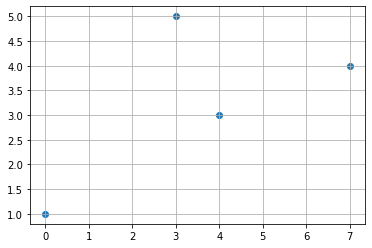

In [2]:
x1 = 0
x2 = 8
k = 2

data = [(0, 1), (3, 5), (4, 3), (7, 4)]
data = np.array(data)
plt.scatter(data[:, 0], data[:, 1])
plt.grid()

## Solution 

In [3]:
def euclidean(point, data):
#         return np.sqrt(np.power(data - point, 2).sum(axis=1))
    return np.sqrt(np.power(data - point, 2))


def get_y(point, data):
    distances = euclidean(point[0], data[:, 0])
    closest_points = data[distances.argsort()[:k]]
    x_p, y_p = closest_points.mean(axis=0)
    return y_p

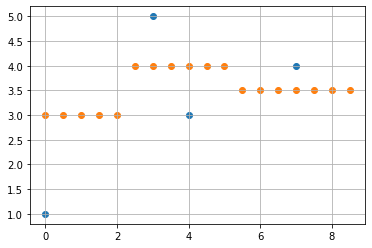

In [4]:
x = np.arange(x1, x2+1, .5)
y = [get_y((x_p, 5), data) for x_p in x]

plt.scatter(data[:, 0], data[:, 1])
plt.scatter(x, y)
plt.grid()

# Ex 4

# Ex 5

## Input

In [69]:
import random
import pandas as pd
import plotly.express as px

data = pd.read_csv('data/clusters.csv', header=None)
data.shape

(75, 3)

In [70]:
fig = px.scatter_3d(data, x=0, y=1, z=2)
fig.show()

## Solution 

In [71]:
def distances(point, centers):
    return np.sqrt(((centers-point)**2).sum(axis=1))

In [123]:
def k_means(data, n_clusters=3, max_iteration=100):
    data = data.copy()
    start_centers = np.array(data.iloc[np.random.choice(data.index, size=n_clusters, replace=False)])
    
    for iter_ in range(max_iteration):
        classes = np.array([np.argmin(distances(point, start_centers)) for point in np.array(data)])
        new_centers = np.array([data[classes == ind].mean().values for ind in range(n_clusters)])

        if (start_centers - new_centers).sum() == 0:
            break
        start_centers = new_centers
    return classes, new_centers

In [124]:
def elblow(data, max_clusters = 10):
    data_to_plot = []
    for n_clusters in range(1, max_clusters+1):
        classes, new_centers = k_means(data, n_clusters=n_clusters)
        
        inertia = (((data - new_centers[classes])**2).sum(axis=1)).mean()
        data_to_plot.append([n_clusters, inertia])
    return pd.DataFrame(data_to_plot, columns=['n_clusters', 'inertia'])


elbow_data = elblow(data)
fig = px.line(data_frame=elbow_data, x='n_clusters', y='inertia', )
fig.show()

In [126]:
classes, new_centers = k_means(data, 3)

fig = px.scatter_3d(data, x=0, y=1, z=2, color=classes)
fig.show()